# 고양이 스티커 붙이기 실습
## 순서
### 본론

#### 0. 사전 작업

#### 1. 정면 이미지에 적용하기

#### 2. 다양한 각도에 적용하기

#### 3. 거리가 다른 이미지에 적용하기

#### 4. 조명이 다른 이미지에 적용하기

### 결론
#### 회고

## 본론
### 0. 사전 작업


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


#### 함수 생성

반복 작업이 예상되는 부분을 미리 함수로 생성한다.

In [2]:
# return bgr, rgb image
def return_img(file_path, show_img=True):
    img_bgr = cv2.imread(file_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    if show_img == True:
        plt.imshow(img_rgb)
        plt.show()
    else:
        pass
        
    return img_rgb
# 얼굴인식
def face_detector(img, pyramid=1, show_img=True):
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(img, 1)   
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
    if show_img == True:
        plt.imshow(img)
        plt.show()
    else:
        pass
    
    return img, dlib_rects

# 얼굴 랜드마크 찾기
def find_landmark(img, dlib_rects, circle_size=2, show_img=True):
    model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img, dlib_rect)
        list_points = list(map(lambda p:(p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    for landmark in list_landmarks:
        for idx, point in enumerate(landmark):
            cv2.circle(img, point, circle_size, (0,255,255), -1)
            
    if show_img == True:
        plt.imshow(img)
        plt.show()
    else:
        pass
    
    return img, list_landmarks, list_points

# 스티커 위치 선정
def set_sticker(dlib_rects, list_landmarks, spot, sticker_path, describe = True):
    stickers = []
    refined_xs = []
    refined_ys = []
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        print (landmark[spot]) # 코의 index는 30 입니다
        x = landmark[spot][0]
        y = landmark[spot][1]
        w = h = dlib_rect.width()
        
        if describe == True:
            print('(x,y):(%d,%d)'%(x,y))
            print('(w,h):(%d,%d)'%(w,h))
        
        sticker = cv2.imread(sticker_path)
        sticker = cv2.resize(sticker, (w,h))
        
        if describe == True:
            print(sticker.shape)
            plt.imshow(cv2.cvtColor(sticker, cv2.COLOR_BGR2RGB))
            plt.show()

        stickers.append(sticker)

        if (x - w//2) < 0:
            refined_xs.append(0)
        else:
            refined_xs.append(x - w//2)

        if (y - h//2) < 0:
            refined_ys.append(0)
        else:
            refined_ys.append(y - h//2)



    return refined_xs, refined_ys, stickers

# 스티커 붙이기
def attach_sticker(img, stickers, refined_xs, refined_ys, show_img = True):
    for refined_x, refined_y, sticker in zip(refined_xs, refined_ys, stickers):
        sticker_area = img[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]]
        img[refined_y:refined_y+sticker.shape[0], refined_x:refined_x+sticker.shape[1]] = np.where(sticker == 255, sticker_area, sticker).astype(np.uint8)
    
    if show_img == True:
        plt.imshow(img)
        plt.show()
    
# resize image
def resize_img(img, width, height, show_img=True):
    re_img = cv2.resize(img, (width, height))
    
    if show_img == True:
        plt.imshow(re_img)
        plt.show()
    else:
        pass
    
    return re_img

### 1. 정면 이미지에 적용하기

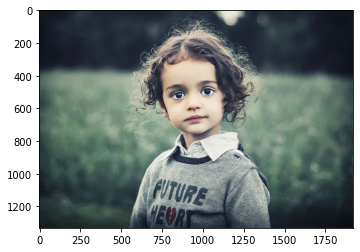

In [3]:
front_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/child.jpg'
fimg_rgb = return_img(front_image_path)
fimg_show = fimg_rgb.copy()

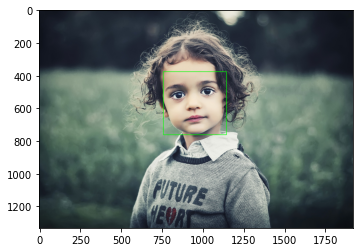

In [4]:
fimg_rgb, f_rects= face_detector(fimg_rgb)

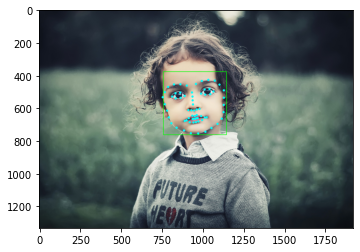

In [5]:
fimg_rgb, f_list_landmarks, f_list_points = find_landmark(fimg_rgb, f_rects, 7)

위치를 잡기 위해 다음 사진을 참고한다.
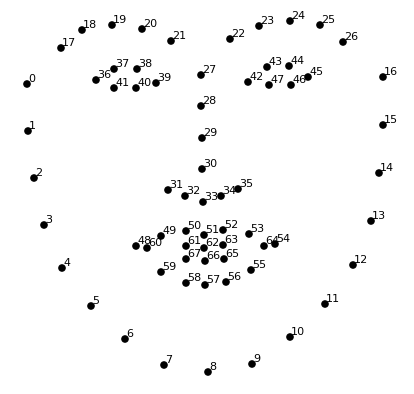
코 끝인 33을 기준으로 한다.

(948, 613)
(x,y):(948,613)
(w,h):(387,387)
(387, 387, 3)


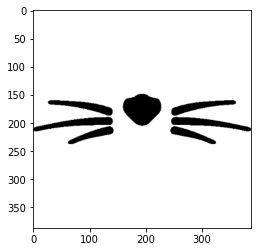

In [6]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

f_refined_xs, f_refined_ys, f_stickers = set_sticker(f_rects, f_list_landmarks, 33, sticker_path)

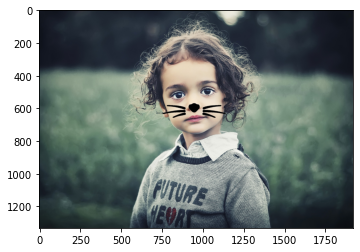

In [7]:
attach_sticker(fimg_show, f_stickers, f_refined_xs, f_refined_ys)

### 2. 다양한 각도에 적용하기

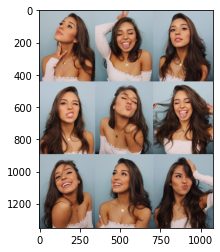

In [13]:
angle_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/diverse_angles.jpg'
aimg_rgb = return_img(angle_image_path)
aimg_show = aimg_rgb.copy()

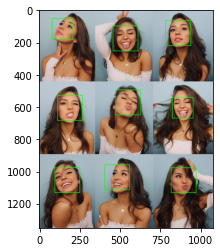

In [14]:
aimg_rgb, a_rects= face_detector(aimg_rgb)

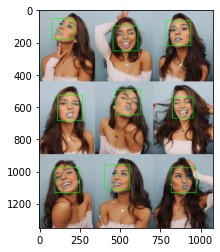

In [15]:
aimg_rgb, a_list_landmarks, a_list_points = find_landmark(aimg_rgb, a_rects, 2)

(538, 184)
(x,y):(538,184)
(w,h):(156,156)
(156, 156, 3)


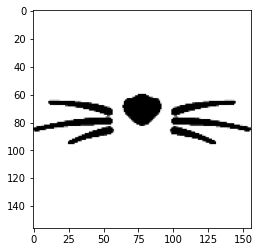

(194, 619)
(x,y):(194,619)
(w,h):(156,156)
(156, 156, 3)


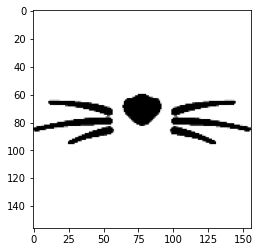

(859, 156)
(x,y):(859,156)
(w,h):(156,156)
(156, 156, 3)


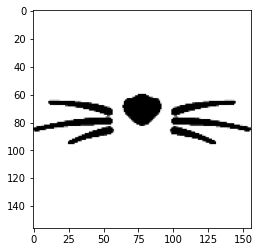

(890, 611)
(x,y):(890,611)
(w,h):(130,130)
(130, 130, 3)


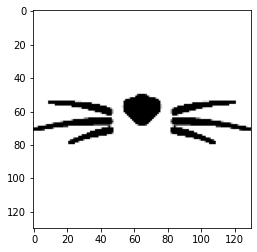

(905, 1076)
(x,y):(905,1076)
(w,h):(156,156)
(156, 156, 3)


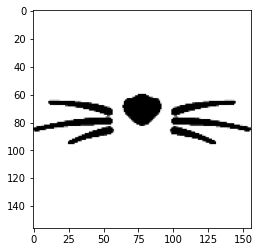

(559, 585)
(x,y):(559,585)
(w,h):(156,156)
(156, 156, 3)


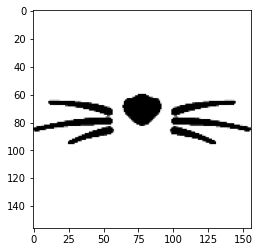

(159, 1054)
(x,y):(159,1054)
(w,h):(156,156)
(156, 156, 3)


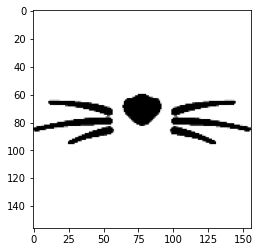

(477, 1055)
(x,y):(477,1055)
(w,h):(155,155)
(155, 155, 3)


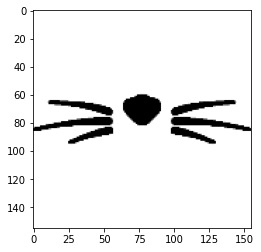

(134, 118)
(x,y):(134,118)
(w,h):(130,130)
(130, 130, 3)


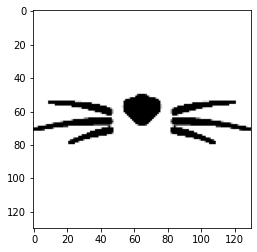

In [16]:
a_refined_xs, a_refined_ys, a_stickers = set_sticker(a_rects, a_list_landmarks, 33, sticker_path)

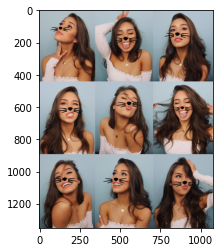

In [17]:
attach_sticker(aimg_show, a_stickers, a_refined_xs, a_refined_ys)

### 3. 거리가 다른 이미지에 적용하기

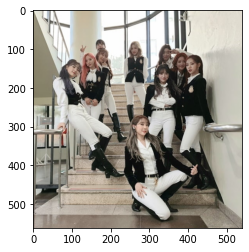

In [22]:
distance_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/diverse_distance.jpg'
dimg_rgb = return_img(distance_image_path)
dimg_show = dimg_rgb.copy()

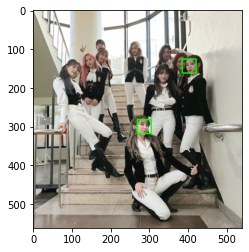

In [23]:
dimg_rgb, d_rects= face_detector(dimg_rgb)

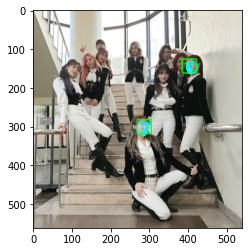

In [24]:
dimg_rgb, d_list_landmarks, d_list_points = find_landmark(dimg_rgb, d_rects, 2)

(289, 307)
(x,y):(289,307)
(w,h):(37,37)
(37, 37, 3)


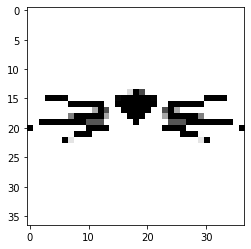

(404, 150)
(x,y):(404,150)
(w,h):(37,37)
(37, 37, 3)


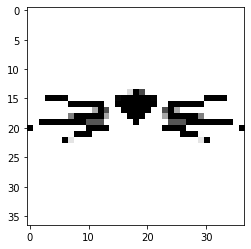

In [27]:
d_refined_xs, d_refined_ys, d_stickers = set_sticker(d_rects, d_list_landmarks, 33, sticker_path)

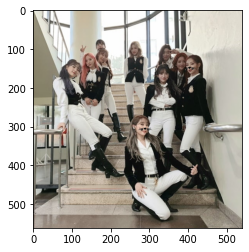

In [28]:
attach_sticker(dimg_show, d_stickers, d_refined_xs, d_refined_ys)

### 4. 조명이 다른 이미지에 적용하기

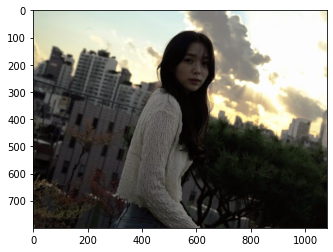

In [31]:
light_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/light.jpg'
limg_rgb = return_img(light_image_path)
limg_show = limg_rgb.copy()

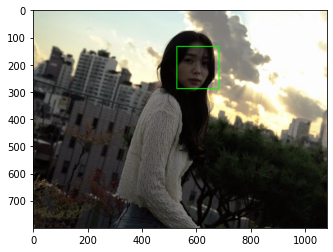

In [32]:
limg_rgb, l_rects= face_detector(limg_rgb)

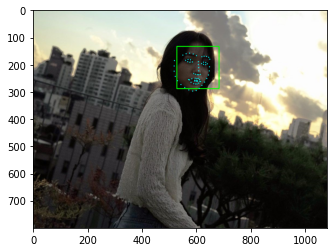

In [33]:
limg_rgb, l_list_landmarks, l_list_points = find_landmark(limg_rgb, l_rects, 2)

(603, 237)
(x,y):(603,237)
(w,h):(156,156)
(156, 156, 3)


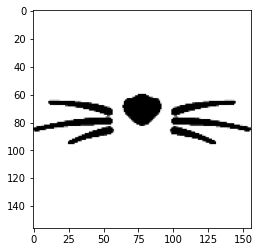

In [34]:
l_refined_xs, l_refined_ys, l_stickers = set_sticker(l_rects, l_list_landmarks, 33, sticker_path)

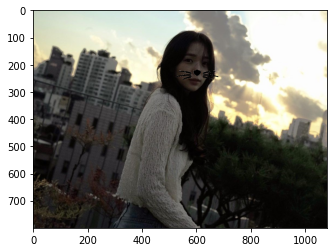

In [35]:
attach_sticker(limg_show, l_stickers, l_refined_xs, l_refined_ys)

## 결론
### 회고

불러온 스티커 이미지의 색상이 반전되는 이슈가 있었지만 이유를 알지 못하겠다. 코드 상엔 문제가 없어 보여서 내용을 비운 후 다시 입력해 실행해보니 해결되어 일단 넘어갔다.


이미지는 구도, 조도와 상관없이 눈, 코, 입이 다 보이는 이미지라면 인식률에 크게 영향을 끼치지 않았다. 다만 인물들이 다른 거리에 서있는 사진을 보면 알 수 있 듯, 거리가 멀어질 수록 인식률이 낮아지는 것을 알 수 있었다.


이미지의 얼굴과 랜드마크를 찾아서 표시할 경우 그 표시가 계속 유지되기 때문에 얼굴, 랜드마크의 위치를 찾기 위한 이미지와 결과를 출력할 때 사용할 이미지를 구분해 놓는 것이 중요하다는 것을 알게 되었다. 그리고 이미지와 스티커의 shape가 다를 경우 적용이 안된다는 것도 알 수 있었다. 이는 브로드캐스팅 에러와 관련 있어 보인다.

아쉬운 점은 얼굴 각도에 따라 스티커의 형태도 변하게 만들지 못한 점이다. 얼굴의 landmark 중에서 코보다 위에 있는 점과 코보다 아래 있는 점을 기준으로 각도를 계산해서 스티커의 각도를 변화시킬 수 있을 거 같다. 그리고 예를 들어 반측면에 스티커를 붙일 경우 더 가깝게 보이는 스티커의 부분은 크기를 좀 더 키우고, 더 먼쪽에 보이는 스티커 부분의 크기는 줄이는 방식으로도 조절할 수 있을 것이다.